<a href="https://colab.research.google.com/github/SuryaTeja-aiml/2024-StatMLAssignments/blob/main/2303A52007StatMLAssignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question:1 Find out the maximum likelihood parameters values for california_housing [‘latitude’,total_rooms’,’house_median_age’,’total_bedrooms’] data, each column individually.

In [5]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/content/housing.csv'  # Path to the uploaded file
housing_data = pd.read_csv(file_path)

# Select the relevant columns
columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
data = housing_data[columns]

# Calculate MLE (mean and variance) for each column assuming a normal distribution
mle_results = {}
for column in columns:
    # Get the data for the column
    col_data = data[column].dropna()

    # MLE for normal distribution parameters (mean and variance)
    mean_mle = np.mean(col_data)
    var_mle = np.var(col_data)

    mle_results[column] = {
        'mean_mle': mean_mle,
        'variance_mle': var_mle
    }

# Display the MLE results with clear separation
for column, stats in mle_results.items():
    print(f"Results for column '{column}':")
    print(f"  Mean (MLE): {stats['mean_mle']}")
    print(f"  Variance (MLE): {stats['variance_mle']}")
    print()  # Blank line for better readability


Results for column 'latitude':
  Mean (MLE): 35.63186143410853
  Variance (MLE): 4.562071602892517

Results for column 'total_rooms':
  Mean (MLE): 2635.7630813953488
  Variance (MLE): 4759214.512668024

Results for column 'housing_median_age':
  Mean (MLE): 28.639486434108527
  Variance (MLE): 158.38858617035862

Results for column 'total_bedrooms':
  Mean (MLE): 537.8705525375618
  Variance (MLE): 177556.6871536956



Question:2 Find log-likelihood values for 50, 75, and 80. For California_housing [‘latitude’] and find the Max likelihood values.

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the CSV file
file_path = '/content/housing.csv'  # Path to the uploaded file
housing_data = pd.read_csv(file_path)

# Select the relevant column
column = 'latitude'
col_data = housing_data[column].dropna()

# MLE for normal distribution parameters (mean and variance)
mean_mle = np.mean(col_data)
var_mle = np.var(col_data)
std_dev_mle = np.sqrt(var_mle)  # Standard deviation is the square root of variance

# Points for which we want to calculate the log-likelihood
points = [50, 75, 80]

# Compute log-likelihood values for the given points
log_likelihoods = {}
for point in points:
    # Calculate the log-likelihood of the given point
    log_likelihood = norm.logpdf(point, loc=mean_mle, scale=std_dev_mle)
    log_likelihoods[point] = log_likelihood

# Find the point with the maximum log-likelihood
max_log_likelihood_point = max(log_likelihoods, key=log_likelihoods.get)
max_log_likelihood_value = log_likelihoods[max_log_likelihood_point]

# Display the log-likelihood values and the maximum likelihood value
print("Log-Likelihood Values:")
for point, log_likelihood in log_likelihoods.items():
    print(f"  Point {point}: {log_likelihood}")

print(f"\nMaximum Log-Likelihood Value:")
print(f"  Point {max_log_likelihood_point}: {max_log_likelihood_value}")


Log-Likelihood Values:
  Point 50: -24.30388630999708
  Point 75: -171.5403881924758
  Point 80: -217.42758836196197

Maximum Log-Likelihood Value:
  Point 50: -24.30388630999708


Question:3 Estimate the density of each column of california_housing [‘latitude’,total_rooms’,’house_median_age’,’total_bedrooms’] data, For the bins [5, 10, 15, 20]. And write the observations.






Column: latitude


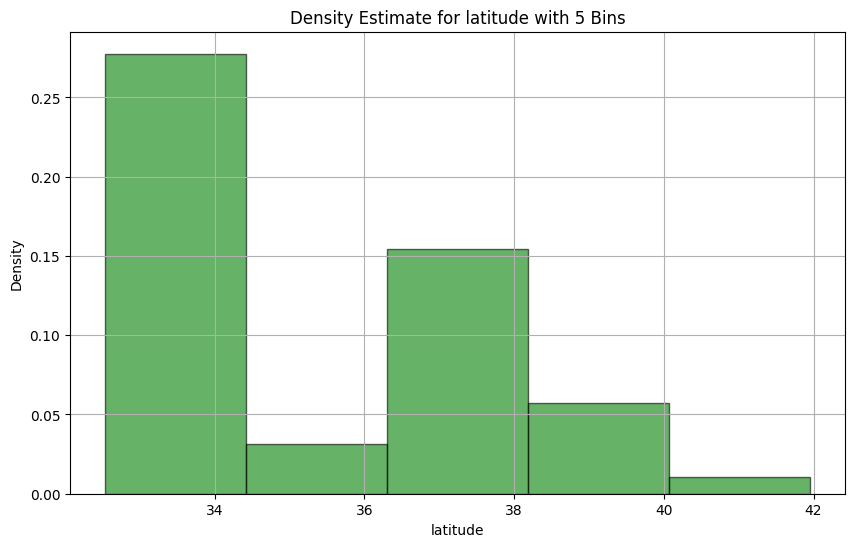

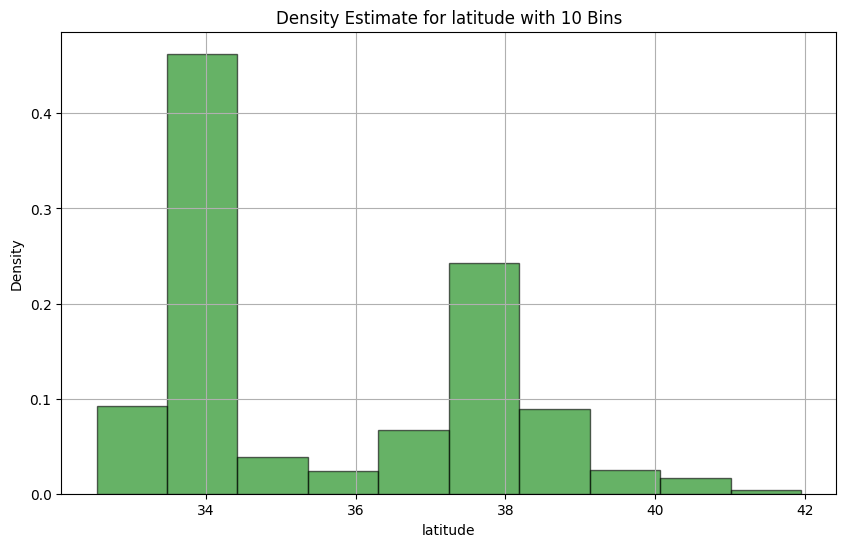

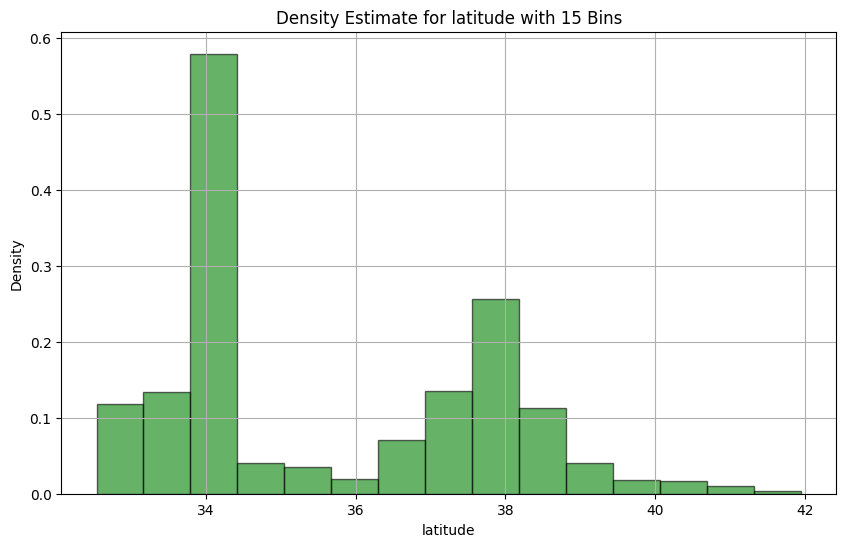

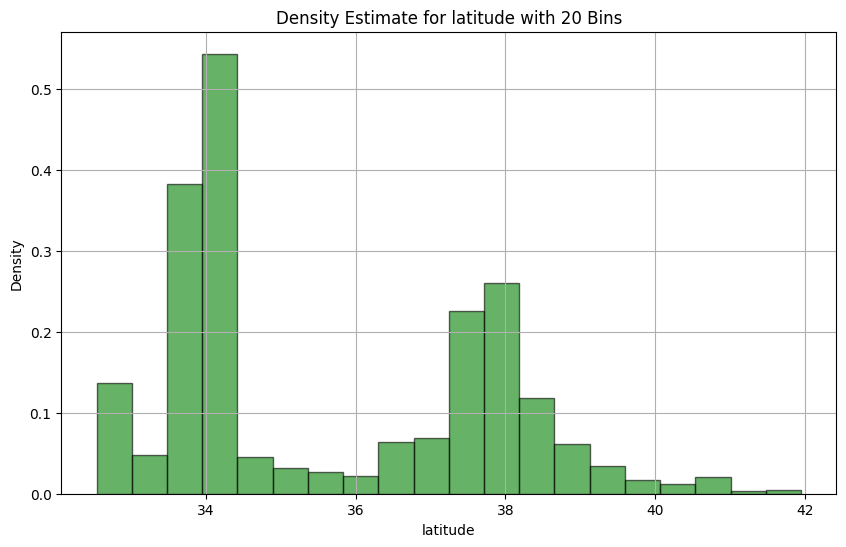


Column: total_rooms


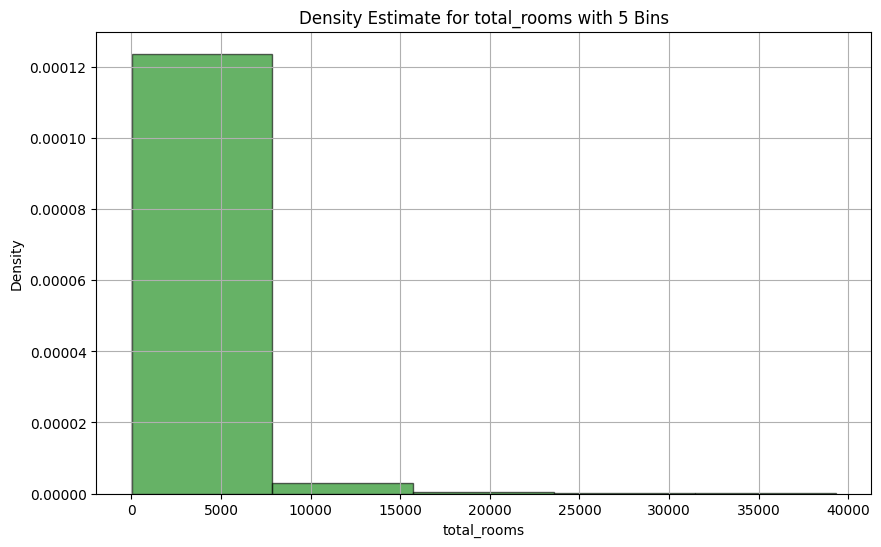

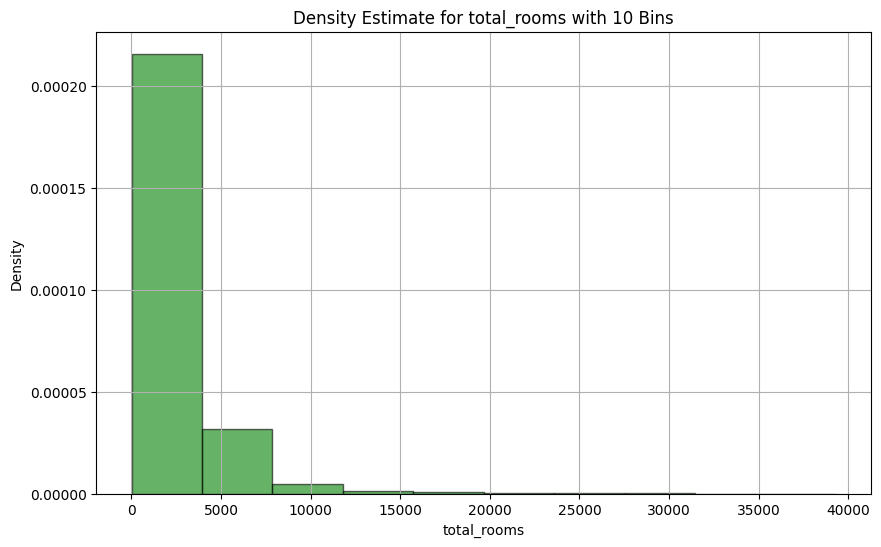

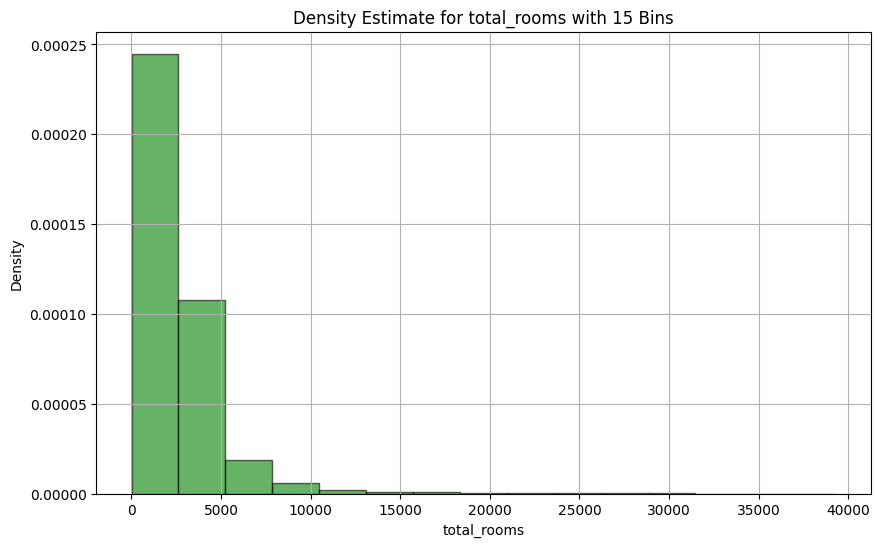

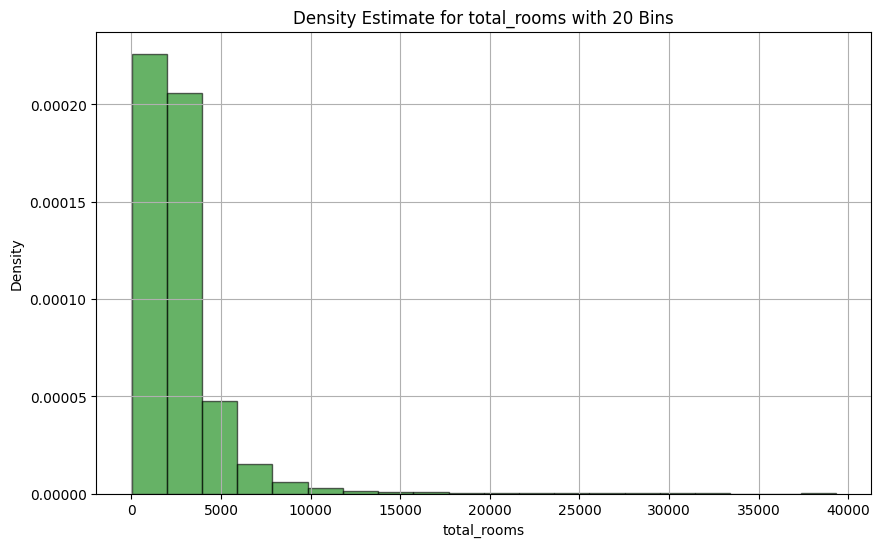


Column: housing_median_age


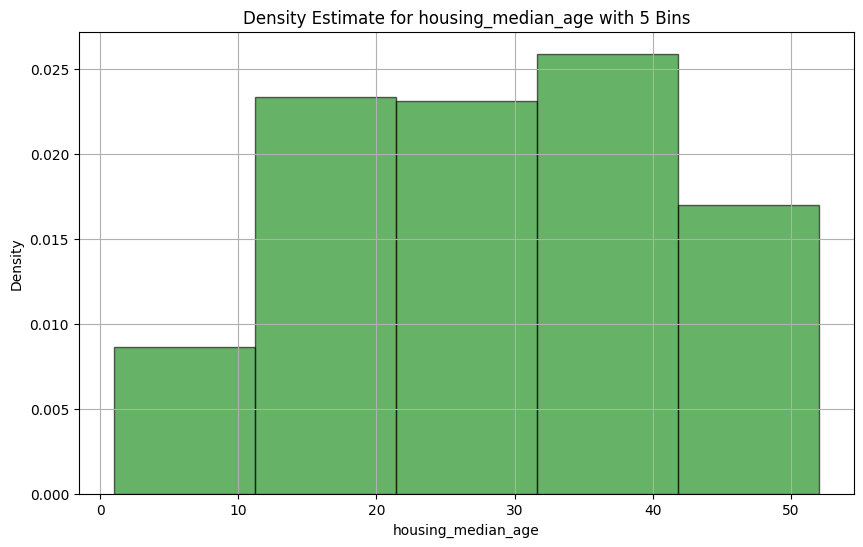

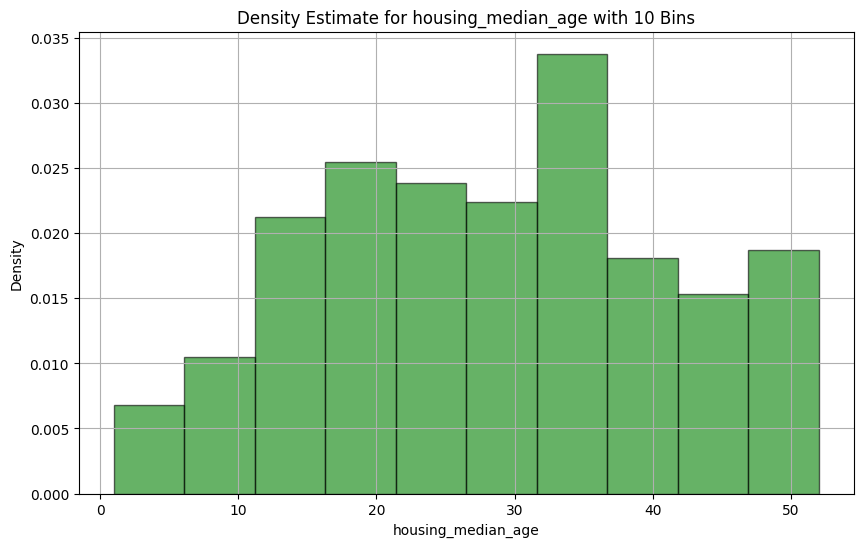

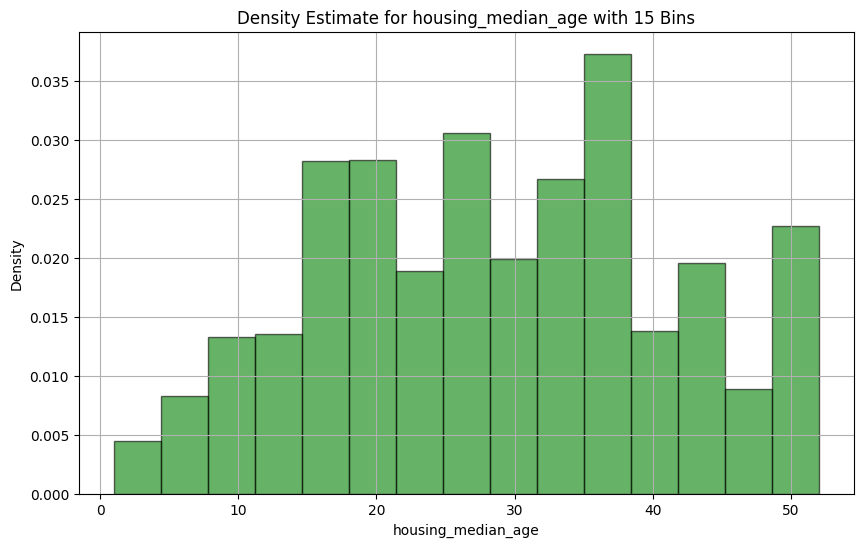

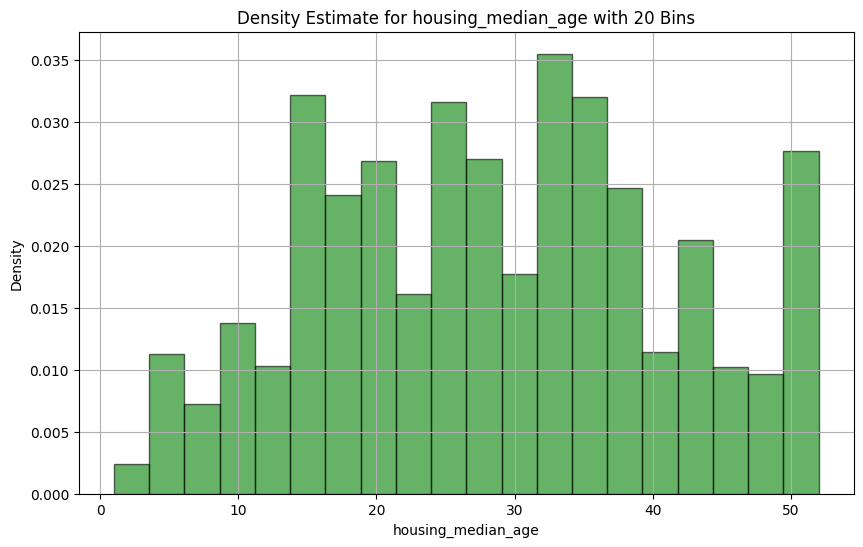


Column: total_bedrooms


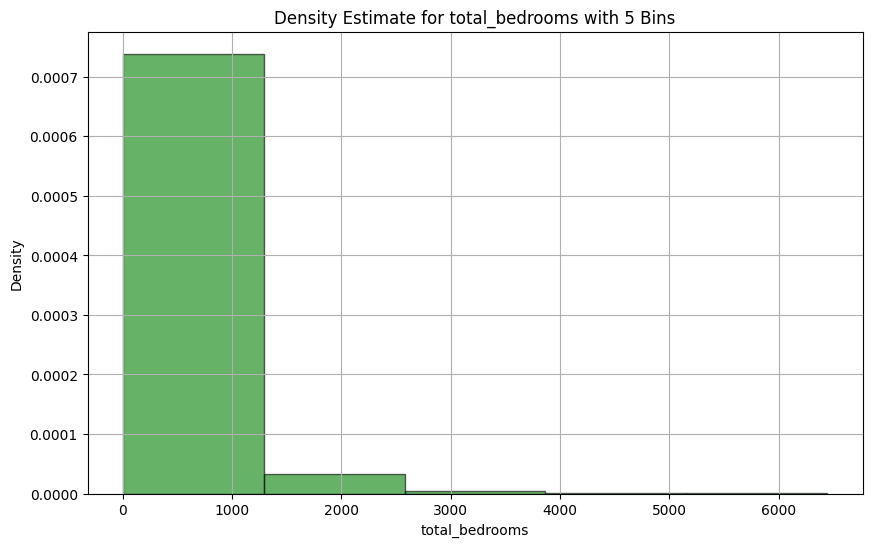

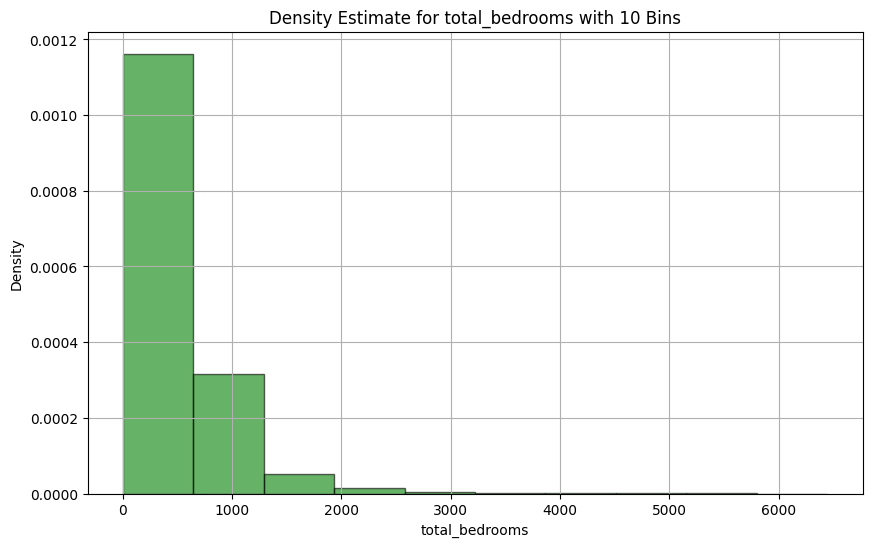

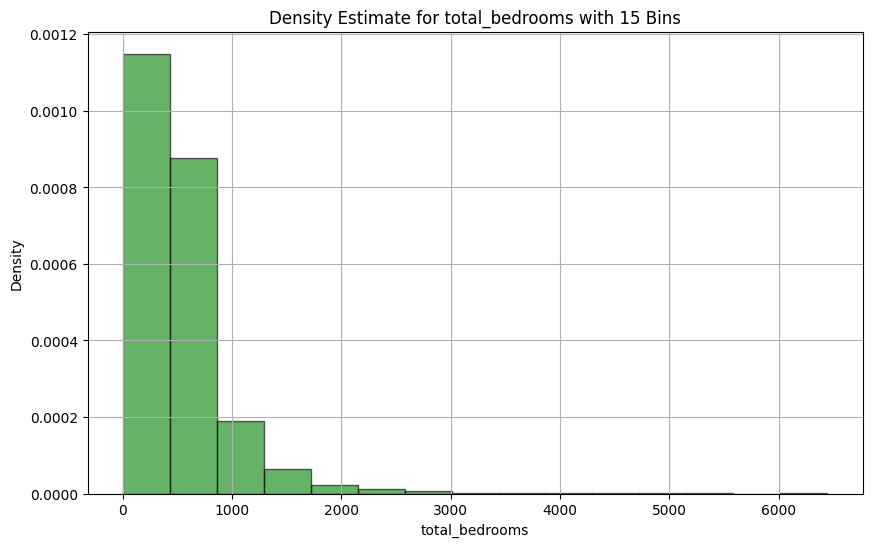

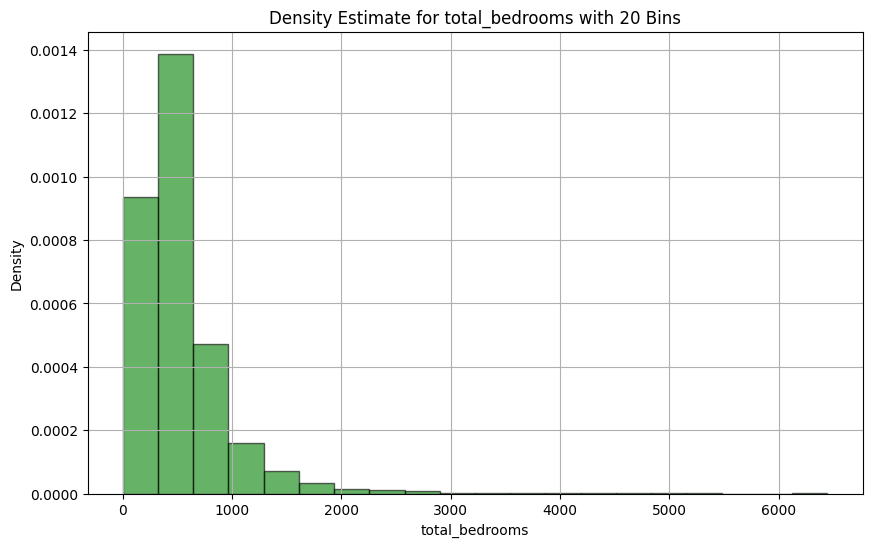


Observations:

Column: latitude
- For 5 bins:
  Bin edges: [32.54  34.422 36.304 38.186 40.068 41.95 ]
  Histogram counts: [0.27759414 0.03143304 0.15456508 0.05740841 0.01034896]
  Interpretation: The density estimate changes with different bin sizes. Smaller bins capture more detail, but may also include noise. Larger bins smooth out the density estimate, potentially missing finer details but providing a clearer overall trend.
- For 10 bins:
  Bin edges: [32.54  33.481 34.422 35.363 36.304 37.245 38.186 39.127 40.068 41.009
 41.95 ]
  Histogram counts: [0.09247131 0.46271697 0.03846106 0.02440501 0.06652168 0.24260847
 0.08958802 0.02522881 0.01668191 0.00401601]
  Interpretation: The density estimate changes with different bin sizes. Smaller bins capture more detail, but may also include noise. Larger bins smooth out the density estimate, potentially missing finer details but providing a clearer overall trend.
- For 15 bins:
  Bin edges: [32.54       33.16733333 33.79466667 34.422 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/housing.csv'  # Path to the uploaded file
housing_data = pd.read_csv(file_path)

# Select the relevant columns
columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
data = housing_data[columns]

# Define the bin sizes
bin_sizes = [5, 10, 15, 20]

# Dictionary to store density estimates for each column
density_estimates = {}

# Calculate and plot density estimates for each column and each bin size
for column in columns:
    print(f"\nColumn: {column}")
    col_data = data[column].dropna()
    density_estimates[column] = {}

    for bins in bin_sizes:
        # Calculate histogram and density
        hist, bin_edges = np.histogram(col_data, bins=bins, density=True)
        density_estimates[column][bins] = (hist, bin_edges)

        # Plot density estimate
        plt.figure(figsize=(10, 6))
        plt.hist(col_data, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
        plt.title(f'Density Estimate for {column} with {bins} Bins')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

# Write observations
print("\nObservations:")
for column, bins_data in density_estimates.items():
    print(f"\nColumn: {column}")
    for bins, (hist, bin_edges) in bins_data.items():
        print(f"- For {bins} bins:")
        print(f"  Bin edges: {bin_edges}")
        print(f"  Histogram counts: {hist}")
        print(f"  Interpretation: The density estimate changes with different bin sizes. Smaller bins capture more detail, but may also include noise. Larger bins smooth out the density estimate, potentially missing finer details but providing a clearer overall trend.")
